*Naive Bayes Classifier*
The naïve bayes classifiers have no built-in way for assessing feature relevance. The conditional and unconditional probabilities associated with the features are determined by Nave Bayes algorithms, which then forecast the class with the highest probability.

*How does naive bayes classifier work*
The Bayes Theorem is used to create a Naive Bayes classifier. It calculates membership probabilities for each class, such as the likelihood that a certain record or data point belongs to that class. The most likely class is defined as the one having the highest probability.
*formula of probability*

P(B|A) = P(A and B)/P(A)


In [1]:
#support vectors.
import pandas as pd


In [2]:
dataset = pd.read_csv(r"C:\Users\lenovo\Downloads\archive\Social_Network_Ads.csv")

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
#input
X = dataset.iloc[:,[2,3]]

In [5]:
y = dataset.iloc[:,4]

In [6]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [7]:
#train and test
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [9]:
X_train,y_train

(     Age  EstimatedSalary
 250   44            39000
 63    32           120000
 312   38            50000
 159   32           135000
 283   52            21000
 ..   ...              ...
 323   48            30000
 192   29            43000
 117   36            52000
 47    27            54000
 172   26           118000
 
 [300 rows x 2 columns],
 250    0
 63     1
 312    0
 159    1
 283    1
       ..
 323    1
 192    0
 117    0
 47     0
 172    0
 Name: Purchased, Length: 300, dtype: int64)

In [10]:
X_test,y_test

(     Age  EstimatedSalary
 132   30            87000
 309   38            50000
 341   35            75000
 196   30            79000
 246   35            50000
 ..   ...              ...
 146   27            96000
 135   23            63000
 390   48            33000
 264   48            90000
 364   42           104000
 
 [100 rows x 2 columns],
 132    0
 309    0
 341    0
 196    0
 246    0
       ..
 146    1
 135    0
 390    1
 264    1
 364    1
 Name: Purchased, Length: 100, dtype: int64)

In [11]:
#scale down
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

In [13]:
X_train = sc.fit_transform(X_train)

In [14]:
X_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [15]:
X_test = sc.fit_transform(X_test)

In [16]:
X_test

array([[-0.54748976,  0.5130727 ],
       [ 0.15442019, -0.61825566],
       [-0.10879604,  0.14615539],
       [-0.54748976,  0.26846116],
       [-0.10879604, -0.61825566],
       [-0.81070599, -1.53554892],
       [-0.45975102, -1.68843113],
       [-0.0210573 ,  2.25592989],
       [-1.60035469, -0.0678797 ],
       [ 0.94406888, -0.83229075],
       [-0.54748976, -0.6488321 ],
       [-0.72296725, -0.46537345],
       [ 0.06668145, -0.46537345],
       [ 0.24215893,  0.20730828],
       [-1.4248772 ,  0.48249625],
       [-0.37201227,  1.43036596],
       [ 0.06668145,  0.20730828],
       [-1.51261594,  0.45191981],
       [ 1.64597884,  1.8278597 ],
       [-0.10879604, -1.47439603],
       [-0.10879604, -0.70998498],
       [ 0.94406888,  2.25592989],
       [ 0.41763642, -0.58767922],
       [ 0.94406888,  1.06344865],
       [-1.16166097, -1.29093738],
       [ 1.11954637,  2.16420057],
       [-0.72296725,  0.5130727 ],
       [-0.63522851,  0.2990376 ],
       [ 0.06668145,

In [17]:
#model creation --- scv - support vector classifier 
# 1 - car purchase
# 0 - not purchase
from sklearn.svm import SVC

In [18]:
svc = SVC(random_state=0)

In [19]:
svc.fit(X_train,y_train)

SVC(random_state=0)

In [20]:
#prediction
y_pred = svc.predict(X_test)

In [21]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [22]:
#perforamance
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
print("Accuracy :", accuracy_score(y_test,y_pred))

Accuracy : 0.93


In [24]:
cf=confusion_matrix(y_test,y_pred)

In [25]:
print(cf)

[[64  4]
 [ 3 29]]


In [26]:
from matplotlib import pyplot as plt

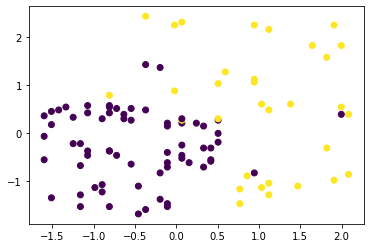

In [27]:
#test - y_pred ---- y_test
X = X_test[:,0]
y = X_test[:,1]
c = y_test
plt.scatter(X,y,c=c)

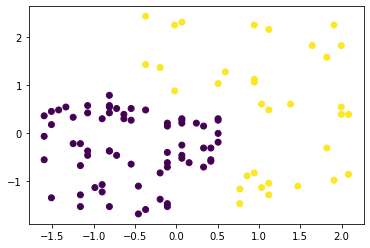

In [28]:
X = X_test[:,0]
y = X_test[:,1]
c = y_pred
plt.scatter(X,y,c=c)